In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import scipy.stats as stats


# Load data
# # data = np.loadtxt('data.txt', delimiter=',')
# obs1 = np.array([17,9,11,14,26,21,23,23,27,16,27,38,20,30,27,34,35,36,35,31])
# obs2 = np.array([19,11,12,7,28,32,33,34,26,19,19,26,27,29,24,34,35,31,31,23])
# expected = np.linspace(13.125,36.875,20)

time = np.arange(0,20, 2)
obs = np.array([30, 15, 11, 9, 3, 1, 2, 1, 2, 1])





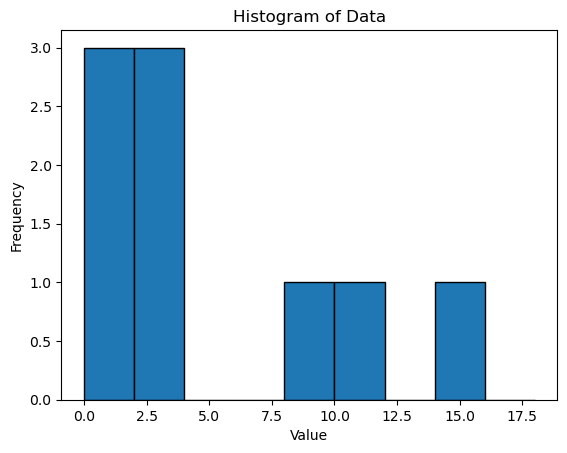

In [3]:
# Making histogram with binwidth of 2
bins = np.arange(0,20,2)
plt.hist(obs, bins=bins, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()


In [4]:
# Making exponential fit functions
def normalized_exp(time, p1, p2):
    return p1 * (1 - np.exp(-2 * p2) * np.exp(-p2 * time))




def exponential(time, p1, p2):
    return p1 * np.exp(-p2 * time)

C:\Users\barit\AppData\Local\Temp\ipykernel_844\1108635331.py:9: RuntimeWarning: overflow encountered in exp
  return p1 * np.exp(-p2 * time)


[29.04822858  0.25250523]
[[2.15775196e+00 1.73616565e-02]
 [1.73616565e-02 5.22047881e-04]]
[1.46892885 0.02284837]


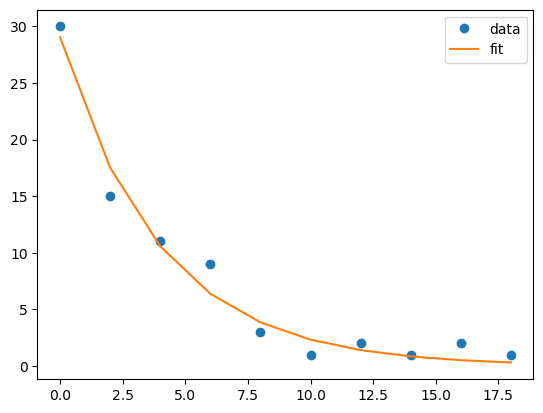

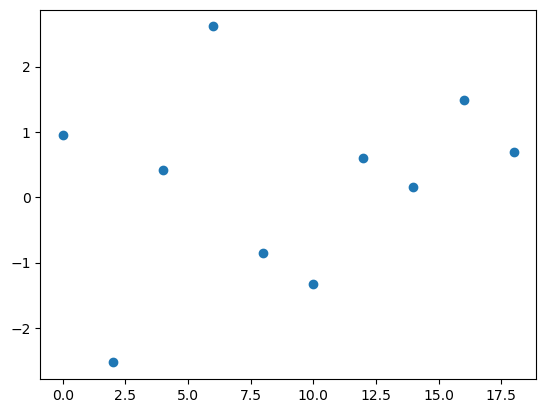

In [5]:
# Doing the fit
from scipy.optimize import curve_fit
popt, pcov = curve_fit(exponential, time, obs)
print(popt)
print(pcov)
print(np.sqrt(np.diag(pcov)))

# Plotting the fit
plt.plot(time, obs, 'o', label='data')
plt.plot(time, exponential(time, *popt), label='fit')
plt.legend()
plt.show()

# Plotting the residuals
plt.plot(time, obs - exponential(time, *popt), 'o')
plt.show()



a,b 0.0 7.5


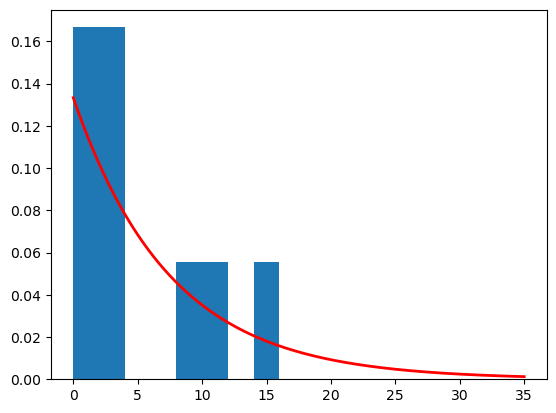

In [8]:
# The exercise ask to make a exponential fit to the data
# We can do this by using the stats.expon.fit function
a,b = stats.expon.fit(obs, floc = 0)

print("a,b", a,b)

# Now I want to show the fit with the histogram
# First I need to make a x-axis
x = np.linspace(0, 35, 1000)

# Then I can plot the histogram and the fit
bins = np.arange(0,20,2)
plt.hist(obs, bins=bins, density=True)
plt.plot(x, stats.expon.pdf(x, a, b), 'r-', lw=2)


What can be said about the relative error of p1. 

In [45]:
# The diagonal elements of pcov are similar


c:\Users\barit\anaconda3\envs\AdvancedDataAnalysis\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[  7.50000005 104.6156811 ]
[[inf inf]
 [inf inf]]
[inf inf]


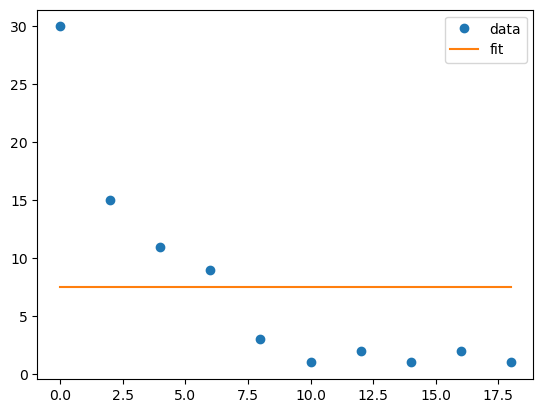

In [49]:
# Doing the fit for the normalized function
guess = [0.9, 6.6]
popt, pcov = curve_fit(normalized_exp, time, obs)
print(popt)
print(pcov)
print(np.sqrt(np.diag(pcov)))

# Plotting the fit
plt.plot(time, obs, 'o', label='data')
plt.plot(time, normalized_exp(time, *popt), label='fit')
plt.legend()
plt.show()


In [40]:
# Using linear algebra approch with chi^2
def chi_squared(obs, expected):
    return np.sum((obs - expected)**2 / expected)



[-8.86981798e+09  9.92092808e+00]
[[inf inf]
 [inf inf]]
[inf inf]


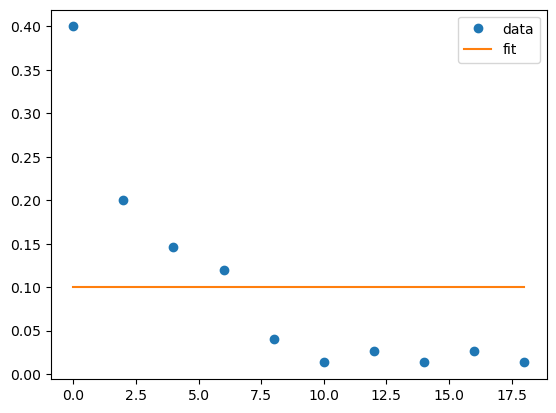

In [41]:
# Normalizing the data
norm_obs = obs / np.sum(obs)
# print(norm_obs)

# Doing the fit for the normalized function


#making guess
guess = [78, 0.21]

#Using curve_fit
popt, pcov = curve_fit(normalized_exp, time, norm_obs, guess)
print(popt)
print(pcov)
print(np.sqrt(np.diag(pcov)))



# Plotting the fit
plt.plot(time, norm_obs, 'o', label='data')
plt.plot(time, normalized_exp(time, *popt), label='fit')
plt.legend()
plt.show()


# #Plotting the residuals
# plt.plot(time, norm_obs - normalized_exp(time, *popt), 'o')
# plt.xlabel('Time')
# plt.ylabel('Residuals')
# plt.title('Residuals of the fit')
# plt.show()




In [31]:
# For the normalized function we try using chi2 and minimizing it
from scipy.optimize import minimize
def chi_squared(obs, expected):
    return np.sum((obs - expected)**2 / expected)

# def normalized_exp(time, p1, p2):
#     return p1 * (1 - np.exp(-2 * p2) * np.exp(-p2 * time))


def normalized_exp(time, p1, p2):
    unnormalized = p1 * (1 - np.exp(-2 * p2) * np.exp(-p2 * time))
    norm = np.sum(unnormalized)
    return unnormalized / norm




# Normalizing the data
norm_obs = obs / np.sum(obs)
# print(norm_obs)

# Making guess
guess = [0.4, 0.25]

# Using minimize
result = minimize(chi_squared, guess, args=(norm_obs, normalized_exp(time, *guess)))
print(result.x)
print(result.fun)

# Plotting the fit
plt.plot(time, norm_obs, 'o', label='data')
plt.plot(time, normalized_exp(time, *result.x), label='fit')
plt.legend()
plt.show()





TypeError: chi_squared() takes 2 positional arguments but 3 were given

array([0.15738774, 0.25284822, 0.31074794, 0.34586589, 0.367166  ,
       0.38008517, 0.38792105, 0.39267374, 0.3955564 , 0.39730482])